<a href="https://colab.research.google.com/github/nar-19/survey-regression-analysis/blob/main/ads_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install / Import packages

In [ ]:
!pip install dython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 52.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


In [ ]:
# Reference study:
# Link: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3298281
# Data: https://drive.google.com/file/d/1agPrV4ZF3qtXEH36Xvji6mN82B3BRlgi/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil, floor

import warnings
warnings.filterwarnings("ignore")

# Import Data from Google Drive

In [ ]:
# Code section to read data from the sheet in this link
# The current accessed data is in csv format
# https://drive.google.com/file/d/1agPrV4ZF3qtXEH36Xvji6mN82B3BRlgi/view?usp=sharing

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1agPrV4ZF3qtXEH36Xvji6mN82B3BRlgi/view?usp=sharing'


# to get the id part of the file
id = link.split("/")[-2]
id
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('banking-ads-data.csv')

dataset = pd.read_csv('banking-ads-data.csv')
dataset

,No.of Respondent,Gender,Age(Years),Qualification,Marital Status,Residence,Family Income,Name of Bank,Q1,Q2,...,Q19,Q20,Q21,advertisement effectiveness,Q22,Q23,Q24,Q25,Q26,social media
0,1,1,1,4,2,1,2,12,4,1,...,2,1,2,1.766667,2,2,1,2,1,1.6
1,2,0,1,3,2,1,3,11,3,1,...,4,2,3,3.000000,2,2,1,3,1,1.8
2,3,1,3,2,1,1,3,11,1,4,...,4,2,3,3.000000,2,2,3,2,4,2.6
3,4,1,2,4,1,1,2,10,2,4,...,3,3,2,2.750000,2,2,3,2,2,2.2
4,5,0,1,4,2,1,3,13,4,4,...,2,2,2,1.750000,2,3,2,5,1,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,3,4,1,1,2,10,2,2,...,2,2,4,2.500000,2,3,2,2,3,2.4
296,297,0,2,4,2,1,1,12,4,4,...,2,3,4,2.500000,1,4,2,2,4,2.6
297,298,0,1,2,2,1,2,12,3,4,...,2,2,2,1.750000,2,4,3,2,3,2.8
298,299,1,1,2,3,1,2,12,4,3,...,2,2,2,2.000000,2,1,3,4,3,2.6


# Variables Exploration

In [ ]:
# Dataset contains 7 demographic variables from 300 survey respondents
#         and 5 measures collected from the survey
# Retain demographic & score columns only
# 'No.of Respondent', 'Gender', 'Age(Years)', 'Qualification', 'Marital Status', 'Residence', 'Family Income', 'Name of Bank',
# 'banking advertisement', 'advertisement efficiency', 'customer satisfaction', 'advertisement effectiveness', 'social media'

data = dataset[['No.of Respondent', 'Gender', 'Age(Years)', 'Qualification', 'Marital Status', 'Residence', 'Family Income', 'Name of Bank',
      'banking advertisement', 'advertisement efficiency', 'customer satisfaction', 'advertisement effectiveness', 'social media']]
data

,No.of Respondent,Gender,Age(Years),Qualification,Marital Status,Residence,Family Income,Name of Bank,banking advertisement,advertisement efficiency,customer satisfaction,advertisement effectiveness,social media
0,1,1,1,4,2,1,2,12,2.833333,2.0,1.833333,1.766667,1.6
1,2,0,1,3,2,1,3,11,2.500000,2.2,2.000000,3.000000,1.8
2,3,1,3,2,1,1,3,11,2.666667,3.2,2.500000,3.000000,2.6
3,4,1,2,4,1,1,2,10,2.333333,2.4,2.666667,2.750000,2.2
4,5,0,1,4,2,1,3,13,2.500000,1.8,2.333333,1.750000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,3,4,1,1,2,10,2.166667,2.2,2.666667,2.500000,2.4
296,297,0,2,4,2,1,1,12,3.333333,2.4,2.666667,2.500000,2.6
297,298,0,1,2,2,1,2,12,2.500000,2.2,2.333333,1.750000,2.8
298,299,1,1,2,3,1,2,12,3.000000,2.2,2.333333,2.000000,2.6


In [ ]:
# Defining function to set figure size
def figure(a,b):
    sns.set(rc={'figure.figsize':(a,b)})

In [ ]:
df = data.copy()
# Set the demographic variables into categorical ('str') type
df[['Gender','Age(Years)','Qualification','Marital Status','Residence','Family Income','Name of Bank']] = df[['Gender','Age(Years)','Qualification','Marital Status','Residence','Family Income','Name of Bank']].astype('str')
df.dtypes
df

,No.of Respondent,Gender,Age(Years),Qualification,Marital Status,Residence,Family Income,Name of Bank,banking advertisement,advertisement efficiency,customer satisfaction,advertisement effectiveness,social media
0,1,1,1,4,2,1,2,12,2.833333,2.0,1.833333,1.766667,1.6
1,2,0,1,3,2,1,3,11,2.500000,2.2,2.000000,3.000000,1.8
2,3,1,3,2,1,1,3,11,2.666667,3.2,2.500000,3.000000,2.6
3,4,1,2,4,1,1,2,10,2.333333,2.4,2.666667,2.750000,2.2
4,5,0,1,4,2,1,3,13,2.500000,1.8,2.333333,1.750000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,3,4,1,1,2,10,2.166667,2.2,2.666667,2.500000,2.4
296,297,0,2,4,2,1,1,12,3.333333,2.4,2.666667,2.500000,2.6
297,298,0,1,2,2,1,2,12,2.500000,2.2,2.333333,1.750000,2.8
298,299,1,1,2,3,1,2,12,3.000000,2.2,2.333333,2.000000,2.6


In [ ]:
cols_string  = df.columns[df.dtypes == 'object'].tolist()
cols_numeric = df.columns[df.dtypes == 'float64'].tolist()
# cols = df.columns[~df.columns.isin(['No.of Respondent'])].tolist()

print(cols_string)
print(cols_numeric)

['Gender', 'Age(Years)', 'Qualification', 'Marital Status', 'Residence', 'Family Income', 'Name of Bank']
['banking advertisement', 'advertisement efficiency', 'customer satisfaction', 'advertisement effectiveness', 'social media']


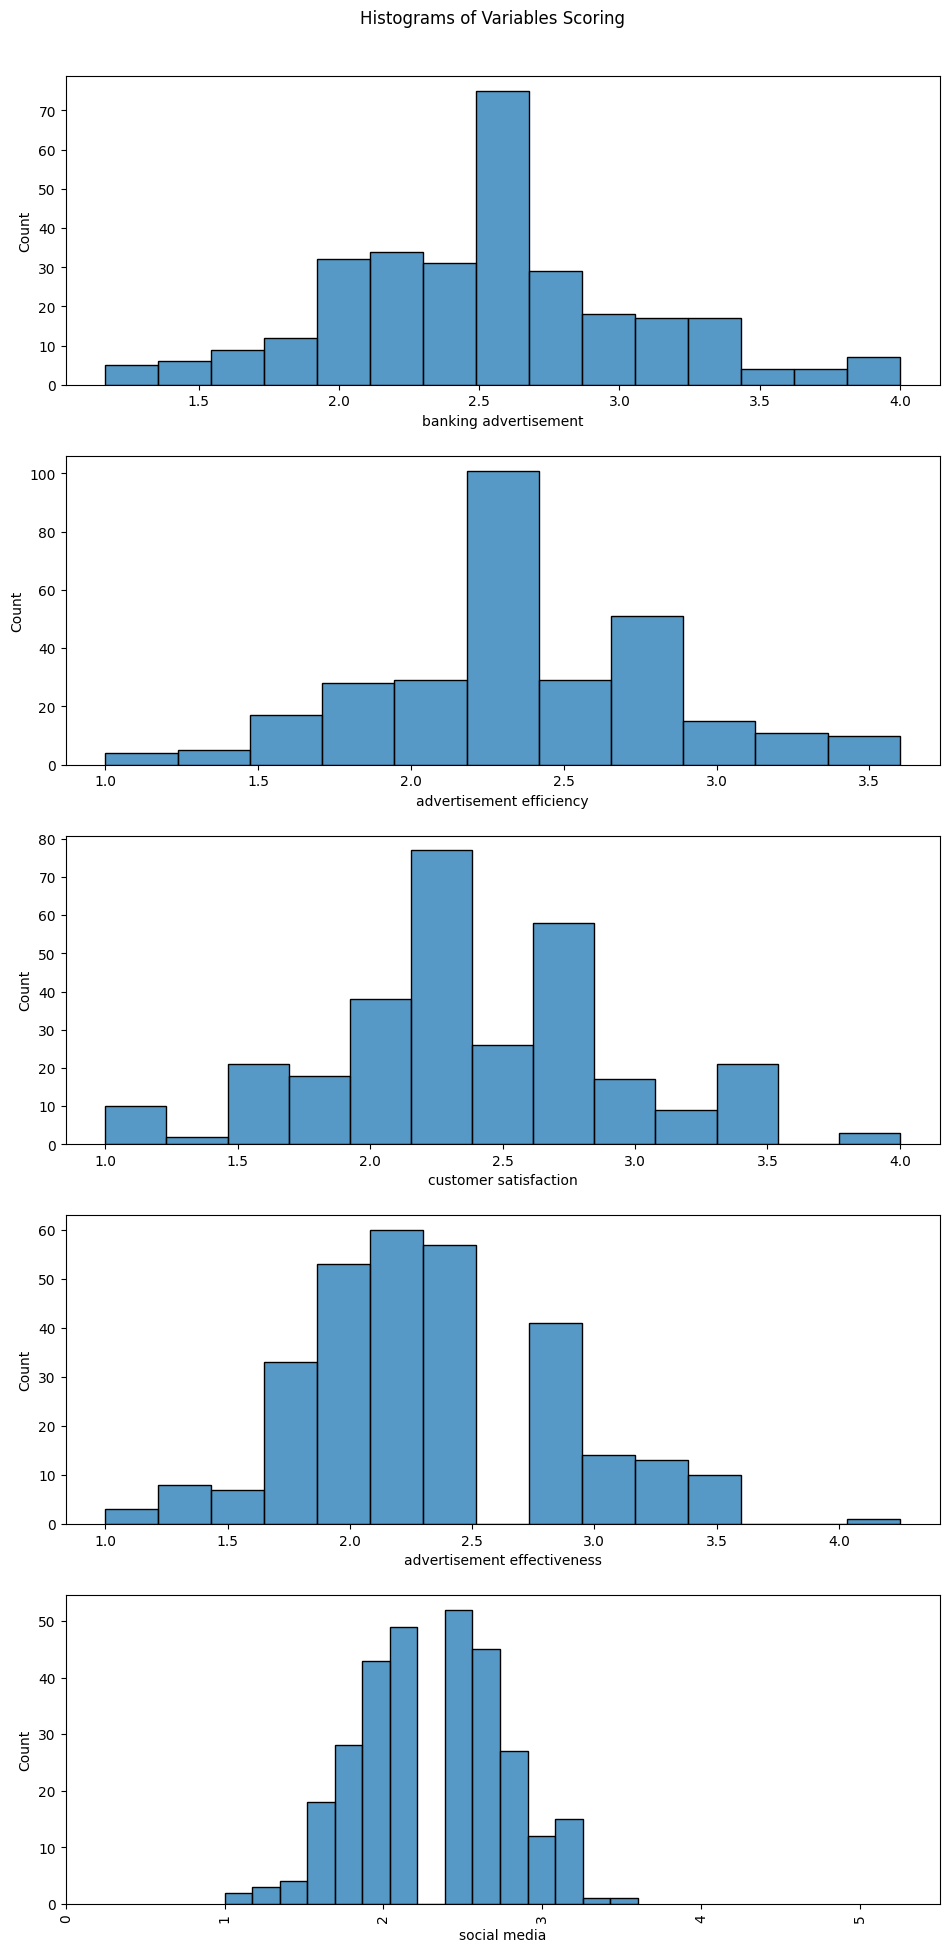

In [ ]:
# Extract the 5 numerical measures to be inspected by the population distribution
df_numeric = df[cols_numeric]
df_numeric

cols = df_numeric.columns.tolist()

figure, axes = plt.subplots(len(cols), 1, sharex=False,
                           figsize=(10,20))
figure.suptitle('Histograms of Variables Scoring')
figure.tight_layout(pad=3)

for i in range(0, len(cols)):
    var = cols[i]
    sns.histplot(data=df_numeric, x=cols_numeric[i], ax=axes[i])
    # axes[i].set_title(df_numeric.columns[i], size=15)                 # Set title of every subplot
    # axes[i].tick_params(axis='x', labelrotation=90, pad=0)            # Rotate x-axis of every subplot
    # axes[i].get_legend().set_visible(False)
    plt.xlim(0,5.5)
    plt.xticks(rotation=90)
    plt.legend

# figure.tight_layout(rect=[0, 0, 0, 1])

# Categorical classes reference
# --------------------------------------------------------------------------------------
# Gender	    Age(Years)	  Qualification	  Marital Status	 Residence	    Family Income
# male=0	    15-25=1	        metric=1	    married=1	        punjab=1	    50,00-100,00=1
# female=1	  25-35=2	        inter=2	      un-married=2	    sindh=2	      100000-150000
#             35-45=3	        graduation=3	divorce=3         baloch=3	          etc
#             45+years=4	    others=4		                    kpk=4
# ---------------------------------------------------------------------------------------

In [ ]:
# Checking the normality values of the collected measures

from scipy.stats import shapiro

for i in df_numeric.columns.tolist():
  # normality test
  stat, p = shapiro(df_numeric[i])
  print(i, ': ', 'stat=', round(stat,3))

banking advertisement :  stat= 0.981
advertisement efficiency :  stat= 0.981
customer satisfaction :  stat= 0.983
advertisement effectiveness :  stat= 0.971
social media :  stat= 0.981


In [ ]:
df_numeric.describe()

,banking advertisement,advertisement efficiency,customer satisfaction,advertisement effectiveness,social media
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.526611,2.369833,2.392778,2.336722,2.308667
std,0.549183,0.490749,0.563741,0.517995,0.457774
min,1.166667,1.000000,1.000000,1.000000,1.000000
25%,2.166667,2.000000,2.000000,2.000000,2.000000
50%,2.500000,2.400000,2.333333,2.250000,2.400000
75%,2.833333,2.800000,2.833333,2.750000,2.600000
max,4.000000,3.600000,4.000000,4.250000,3.600000


### Remark on the 5 Measures

- The 5 population distributions plots & the statistical p-value from the Shapiro-Wilk test above show that all 5 measures are normally distributed. There is no skewness detected.
- All of the variables obtain the peak values between 2 & 3 (The standard ratings are between 1-5. 5 is the best rating).
- Variables 'banking advertisement', 'customer satisfaction', and 'advertisement effectiveness' obtain ranges between 1 - >=4. Variables 'advertisement efficiency' and 'social media' coverage only range between 1 - 3.6 that show lower positive perception on these 2 measures.
- The overall ratings average that peak around 3 indicate that either the respondents are quite neutral with & do not have strong positive or negative perception based on the provided survey questions, or the survey questions themselves are not really effective in quantifying the measures.








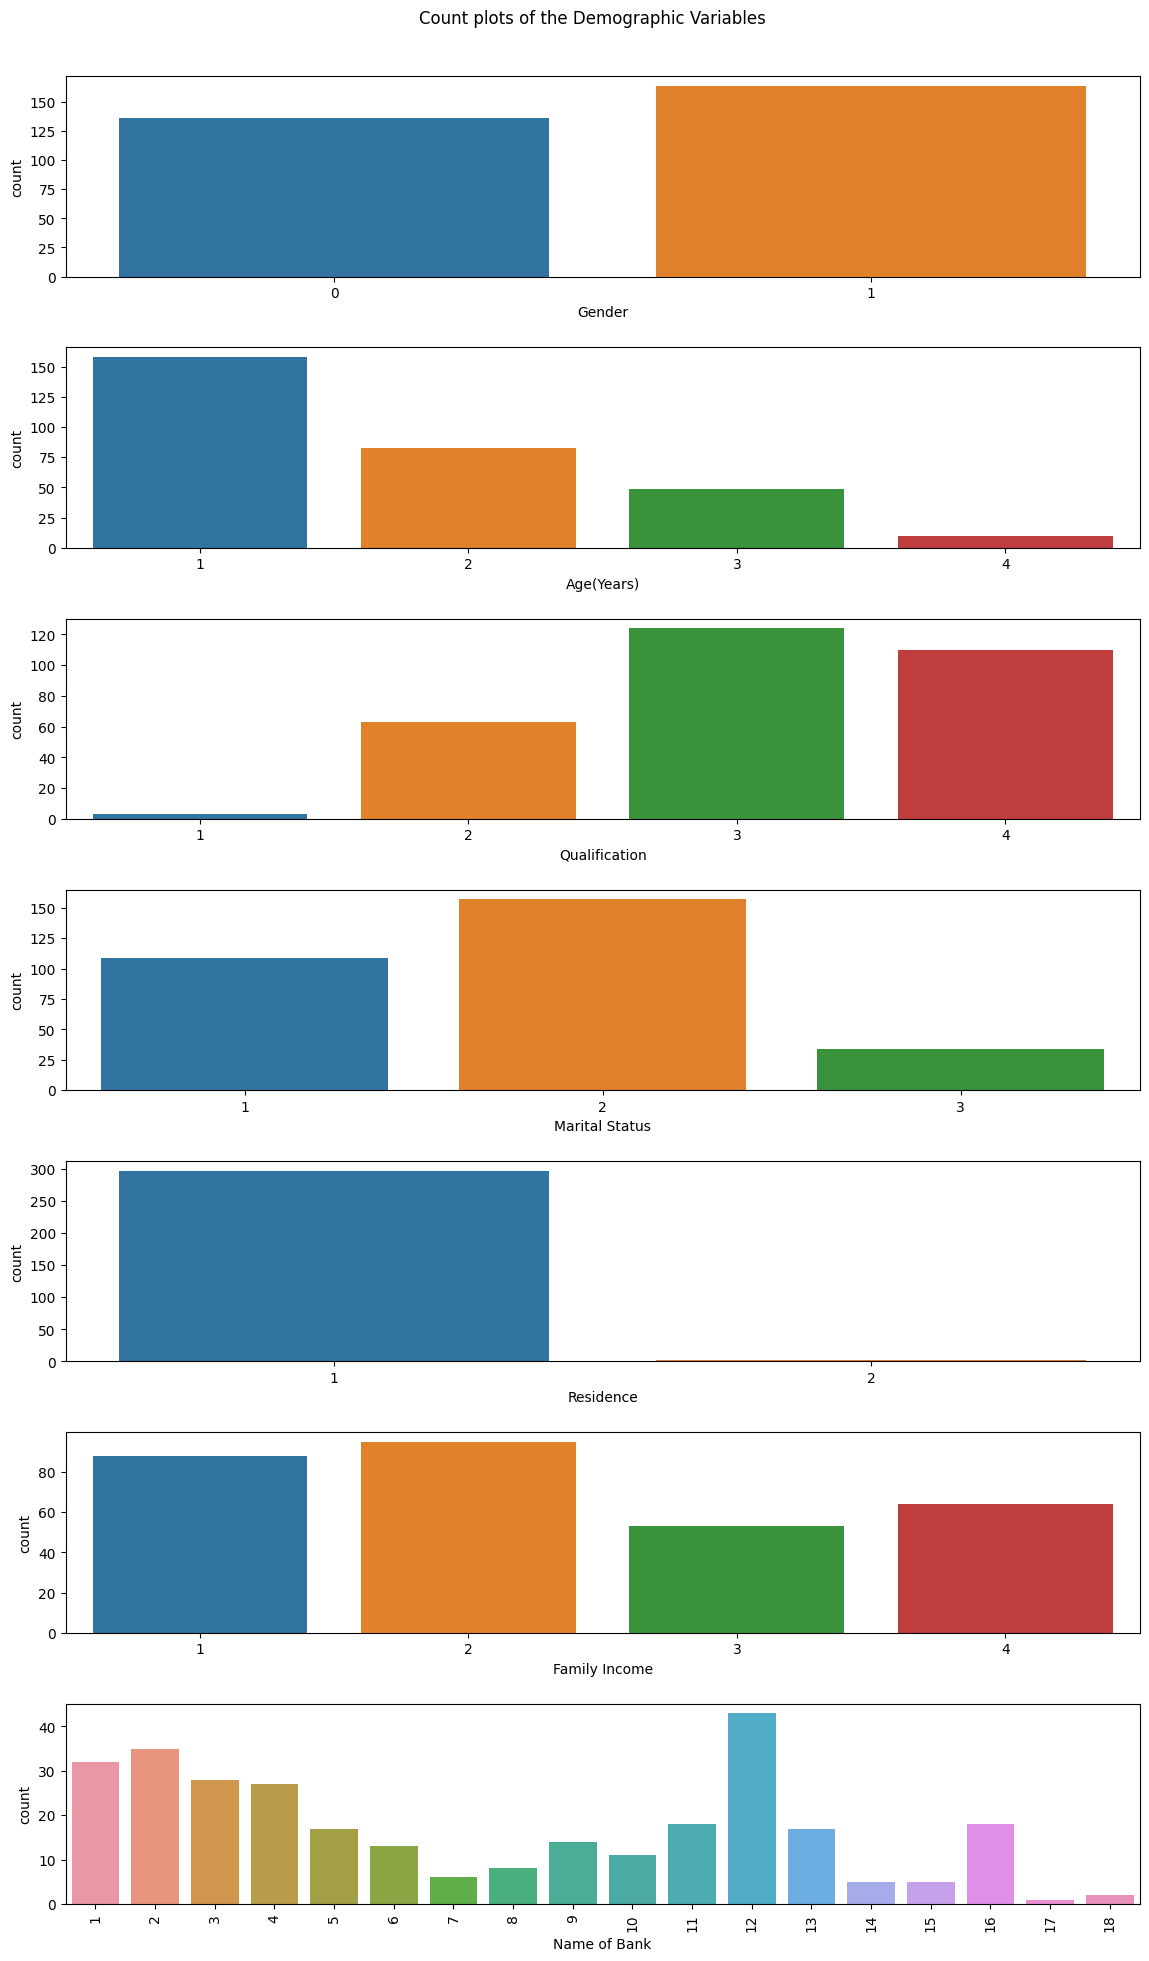

In [ ]:
df_string = df[cols_string]
df_string = df_string.astype('int')
cols = df_string.columns.tolist()

figure, axes = plt.subplots(len(cols), 1, sharex=False,
                           figsize=(12,20))
figure.suptitle('Count plots of the Demographic Variables')

figure.tight_layout(pad=3)

for i in range(0, len(cols)):
    var = cols[i]

    sns.countplot(data=df_string, x=cols[i], ax=axes[i])
    # axes[i].set_title(df_numeric.columns[i], size=15)                 # Set title of every subplot
    # axes[i].tick_params(axis='x', labelrotation=90, pad=0)            # Rotate x-axis of every subplot
    # axes[i].get_legend().set_visible(False)
    # plt.xlim(0,5.5)
    plt.xticks(rotation=90)
    plt.legend

# figure.tight_layout(rect=[0, 0, 0, 1])

### Remark on demographic variables

- From the 7 demographic variables studied above, 4 of them show significant imbalances in the number of respondents. The variables are - Age category, qualification category, residence category, and name of bank category.
- For future improvement, consideration can be taken to increase samples from these classes.

# Relationship Analysis of Target Variables

## Multicollinearity

In [ ]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor #checking for multicollinearity between variables

In [ ]:
# VIF between measures
# vif calculation function, VIF is not meant for categorical data maybe chi-squared function
# will suit our purpose better
# def vif_calculation(df, list_to_calc):
def vif_calculation(df):
    # adding a const is crucial for VIF calculation or else the value will be large
    df = add_constant(df)

    '''
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    '''

    vifs = pd.Series(
        [1 / (1. - OLS(df[col].values, df.loc[:, df.columns != col].values).fit().rsquared)
         for col in df], index=df.columns, name='VIF'
    )

    return vifs

In [ ]:
# banking advertisement, advertisement efficiency, customer satisfaction, advertisement effectiveness, social media
df_vif = df[['banking advertisement', 'advertisement efficiency', 'customer satisfaction', 'advertisement effectiveness', 'social media']]
vifs = vif_calculation(df_vif)

vifs

const                          69.981204
banking advertisement           1.031818
advertisement efficiency        1.383800
customer satisfaction           1.316647
advertisement effectiveness     1.585119
social media                    1.260455
Name: VIF, dtype: float64

Remark on Multicollinearity analysis:

- The Varience Influence Factor (VIF) of the 5 measures show very low VIF value <5 for each measure.
- This indicates very low or non-existence multicollinearity between the measures which is a good indicator of measures independence.

## Correlation Analysis

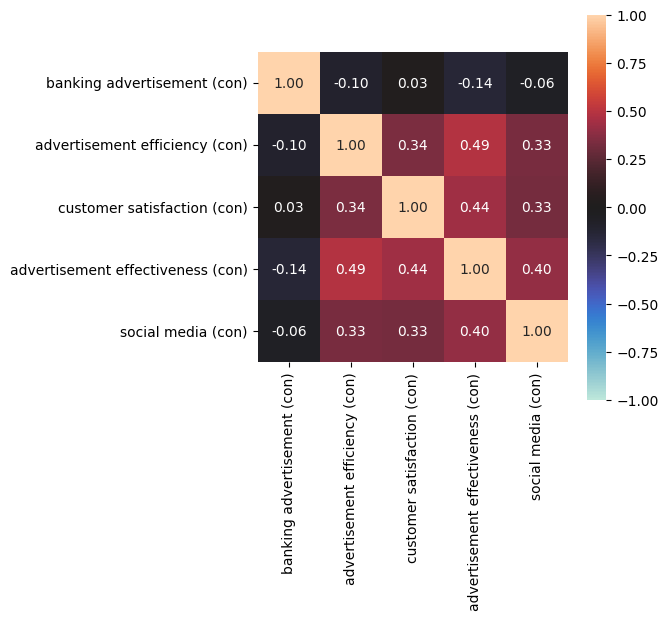

In [ ]:
import dython

# Correlation between measures
from dython import nominal #required to generate heatmap for correlation analysis
nominal.associations(df_vif,figsize=(5,5),mark_columns=True);

Remark on Collinearity analysis:
- The correlation analysis shows a range from low to intermediate correlation strength
- Advertisement effectiveness has intermediate correlation strength with advertisement efficiency (which is good that it is indicative of ads performance), customer satisfaction and social media coverage.
- Banking advertisement coverage measure shows low correlation with all other measures. This indicates low correlation between banking ads reach into the crowd customers over the impacts from the ads e.g. effectiveness/efficiency.

# Define SciLearnKit Regression Model function

In [ ]:
from sklearn.model_selection import train_test_split #linear regression data split
from sklearn.linear_model import LinearRegression #linear regression
from sklearn import linear_model #linear regression
from sklearn.metrics import r2_score #linear regression metrics
# from statsmodels.regression.linear_model import OLS

def regression_model(X,y,rand_state):
#Set model constant
  # RANDOM_STATE = 40

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rand_state)

  model = LinearRegression(fit_intercept=True, n_jobs=-1)
  model.fit(X_train, y_train)
  model_intercept = model.intercept_

  features = X.columns.tolist()
  coefficients = model.coef_.tolist()
  features.insert(0, 'intercept')
  coefficients.insert(0, model_intercept)

  model_coefficients = pd.DataFrame({'features': features, 'coefficients': coefficients})

  model_train_r2_score = r2_score(y_train, model.predict(X_train))
  model_test_r2_score = r2_score(y_test, model.predict(X_test))

  return model_coefficients, model_train_r2_score, model_test_r2_score, X_train, X_test, y_train, y_test, model

In [ ]:
# Define demographic variables to be assessed with each individual measure
cols_demographic = ['Gender','Age(Years)','Qualification','Marital Status',
                     'Residence','Family Income','Name of Bank']

## Analysis of Measure 1: Banking Ads coverage vs Demographic Variables

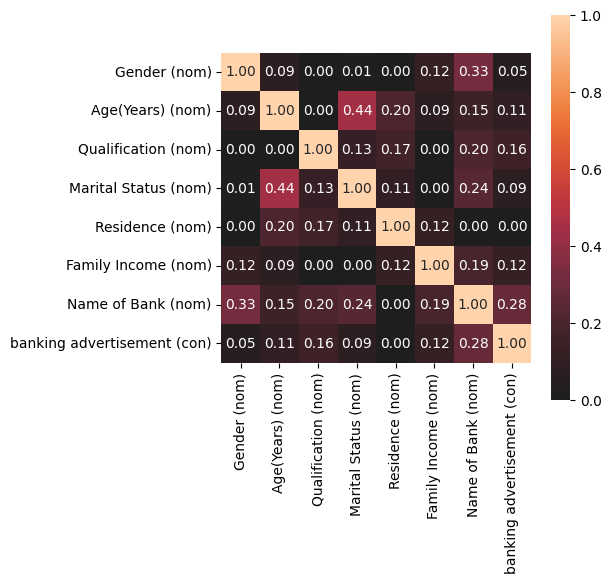

In [ ]:
# 'banking advertisement'
# Heatmap 1:
df_banking = pd.concat([df[cols_demographic], df[['banking advertisement']] ], axis=1)
nominal.associations(df_banking, figsize=(5,5), mark_columns=True);

Regression performance: 
Training R2:  0.013
Training R2:  -0.015

Regression Coefficients: 

         features  coefficients
0       intercept      2.474062
1          Gender      0.046060
2      Age(Years)     -0.003445
3   Qualification      0.005087
4  Marital Status      0.064032
5       Residence     -0.209101
6   Family Income      0.017897
7    Name of Bank      0.007260


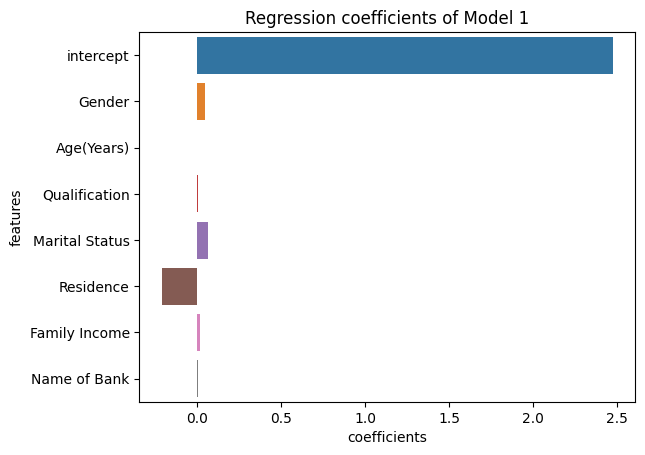

In [ ]:
# Define X (Demographic variables)
# Define y
X = df_banking[df_banking.columns[~df_banking.columns.isin(['banking advertisement'])]]
y = df_banking['banking advertisement']
# Run regression function to generate model, regression coefficient, training performance & testing performance
model_coef1, training_r2, testing_r2, X_train, X_test, y_train, y_test, model  = regression_model(X,y,rand_state=40)

# plt.figure(figsize=(15,10))
# coeff = reg.params
# coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]

# Print regression coefficients values & generate barplot
print('Regression performance: ')
print('Training R2: ', round(training_r2,4))
print('Training R2: ', round(testing_r2,4))
print('')
print('Regression Coefficients: ')
print('')
print(model_coef1)
sns.barplot(x=model_coef1.coefficients,
            y=model_coef1.features,
            orient='h')
plt.title('Regression coefficients of Model 1')
plt.show()

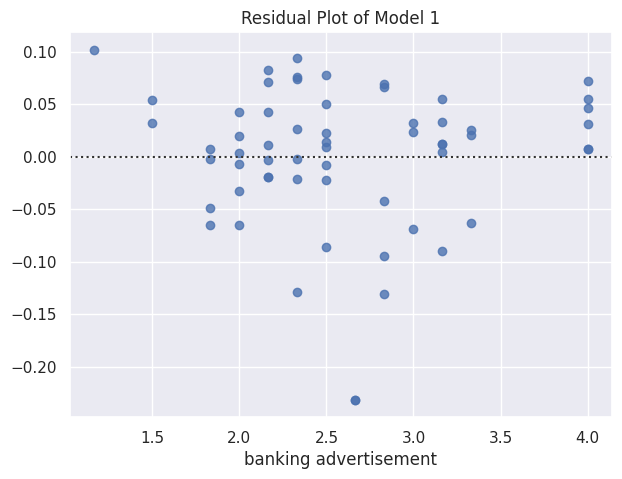

In [ ]:
# Generate Regression residual plot to see whether or not the residual value is randomized
# Set figure size and theme
ax = sns.set(rc={'figure.figsize':(7,5)}, style="darkgrid")
ax = sns.residplot(x = y_test,
              y = model.predict(X_test),
              data = data)

plt.title('Residual Plot of Model 1')
plt.show()

Remark:
- Banking Advertisement coverage parameter shows low correlation with all demographic variables. As such, it is expected that the regression model performance wouldn't be good.
- This is proven by the Training & Testing performance which is just around abs(0.01). The Residual plot also shows some pattern in the residuals instead of a good, randomized spread. Thus, the model is not a good model.
- The comparison between the demographic variables shows that the Residence category variable has a higher coefficient magnitude as compared to the other variables.


## Analysis of Measure 2: Advertisement Efficiency vs Demographic Variables

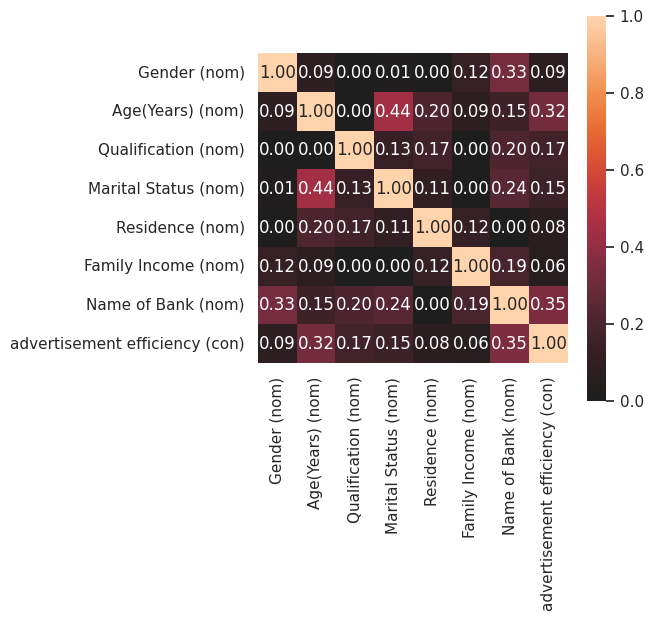

In [ ]:
# 'banking advertisement'
# Heatmap 1:
df_ads_efficiency = pd.concat([df[cols_demographic], df[['advertisement efficiency']] ], axis=1)
nominal.associations(df_ads_efficiency, figsize=(5,5), mark_columns=True);

Regression performance: 
Training R2:  0.1055
Training R2:  -0.019

Regression Coefficients: 

         features  coefficients
0       intercept      3.093281
1          Gender     -0.074785
2      Age(Years)      0.135006
3   Qualification     -0.061700
4  Marital Status     -0.059154
5       Residence     -0.682979
6   Family Income      0.004692
7    Name of Bank      0.011380


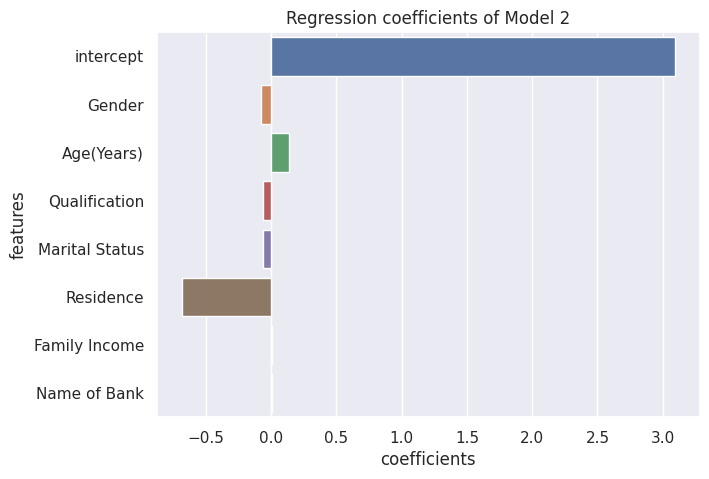

In [ ]:
# Define X (Demographic variables)
# Define y
X = df_ads_efficiency[df_ads_efficiency.columns[~df_ads_efficiency.columns.isin(['advertisement efficiency'])]]
y = df_ads_efficiency['advertisement efficiency']
# Run regression function to generate model, regression coefficient, training performance & testing performance
model_coef2, training_r2, testing_r2, X_train, X_test, y_train, y_test, model  = regression_model(X,y,rand_state=40)

# plt.figure(figsize=(15,10))
# coeff = reg.params
# coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]

# Print regression coefficients values & generate barplot
print('Regression performance: ')
print('Training R2: ', round(training_r2,4))
print('Training R2: ', round(testing_r2,4))
print('')
print('Regression Coefficients: ')
print('')
print(model_coef2)
sns.barplot(x=model_coef2.coefficients,
            y=model_coef2.features,
            orient='h')
plt.title('Regression coefficients of Model 2')
plt.show()

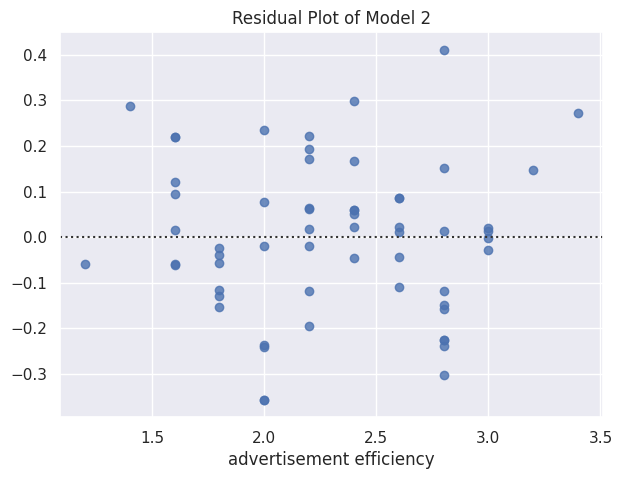

In [ ]:
# Generate Regression residual plot to see whether or not the residual value is randomized
# Set figure size and theme
ax = sns.set(rc={'figure.figsize':(7,5)}, style="darkgrid")
ax = sns.residplot(x = y_test,
              y = model.predict(X_test),
              data = data)

plt.title('Residual Plot of Model 2')
plt.show()

Remark:
- Advertisment efficiency parameter shows some intermediate correlation strength with the Age variable (0.32) and the Name of Bank variable (0.35).
- However, the Training & Testing performance are rather low (~0.11 & ~0.02). The Residual plot also shows a better randomization as compared to the Banking Ads model which indicates a slightly better performing model.
- The comparison between the demographic variables shows that the Residence category variable has a higher coefficient magnitude as compared to the other variables.

## Analysis of Measure 3: Customer Satisfaction vs Demographic Variables

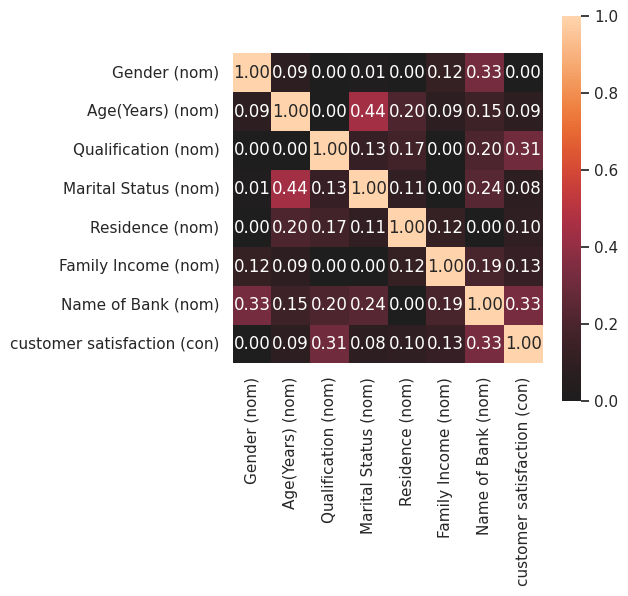

In [ ]:
# 'banking advertisement'
# Heatmap 1:
df_cust_satisfaction = pd.concat([df[cols_demographic], df[['customer satisfaction']] ], axis=1)
nominal.associations(df_cust_satisfaction, figsize=(5,5), mark_columns=True);

Regression performance: 
Training R2:  0.0644
Training R2:  -0.0378

Regression Coefficients: 

         features  coefficients
0       intercept      3.190463
1          Gender      0.041635
2      Age(Years)      0.007679
3   Qualification     -0.143730
4  Marital Status      0.076382
5       Residence     -0.612145
6   Family Income      0.018354
7    Name of Bank      0.009212


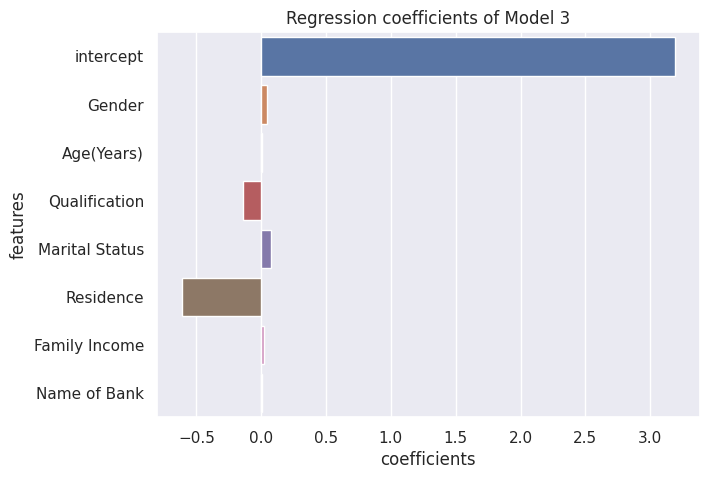

In [ ]:
# Define X (Demographic variables)
# Define y
X = df_cust_satisfaction[df_cust_satisfaction.columns[~df_cust_satisfaction.columns.isin(['customer satisfaction'])]]
y = df_cust_satisfaction['customer satisfaction']
# Run regression function to generate model, regression coefficient, training performance & testing performance
model_coef3, training_r2, testing_r2, X_train, X_test, y_train, y_test, model  = regression_model(X,y,rand_state=40)

# plt.figure(figsize=(15,10))
# coeff = reg.params
# coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]

# Print regression coefficients values & generate barplot
print('Regression performance: ')
print('Training R2: ', round(training_r2,4))
print('Training R2: ', round(testing_r2,4))
print('')
print('Regression Coefficients: ')
print('')
print(model_coef3)
sns.barplot(x=model_coef3.coefficients,
            y=model_coef3.features,
            orient='h')
plt.title('Regression coefficients of Model 3')
plt.show()

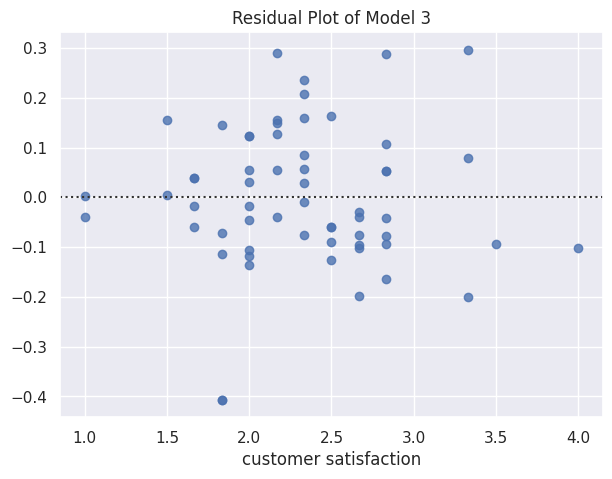

In [ ]:
# Generate Regression residual plot to see whether or not the residual value is randomized
# Set figure size and theme
ax = sns.set(rc={'figure.figsize':(7,5)}, style="darkgrid")
ax = sns.residplot(x = y_test,
              y = model.predict(X_test),
              data = data)

plt.title('Residual Plot of Model 3')
plt.show()

Remark:

- The customer satisfaction parameter shows some intermediate correlation strength with the Qualification variable (0.31) and the Name of Bank variable (0.33).
- However, the Training & Testing performance are low (~0.06 & ~0.04). The Residual plot shows that the residuals are not scattered randomly enough and are concentrated towards the center area of the graph. This indicates irreliability for prediction throughout the questionnaire score range.
- The comparison between the demographic variables shows that the Residence category variable has a higher coefficient magnitude as compared to the other variables.

## Analysis of Measure 4: Advertisement Effectiveness vs Demographic Variable

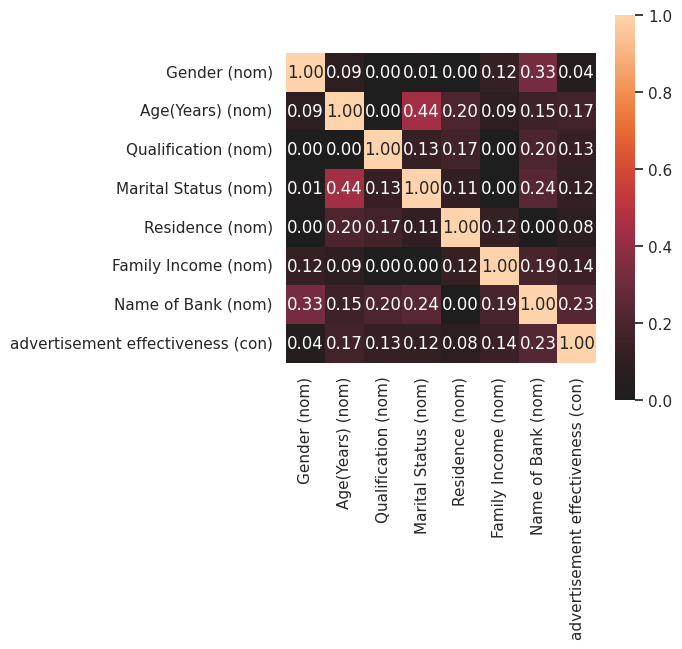

In [ ]:
# 'advertisement effectiveness'
# Heatmap 1:
df_ads_effectiveness = pd.concat([df[cols_demographic], df[['advertisement effectiveness']] ], axis=1)
nominal.associations(df_ads_effectiveness, figsize=(5,5), mark_columns=True);

Regression performance: 
Training R2:  0.0351
Training R2:  -0.0765

Regression Coefficients: 

         features  coefficients
0       intercept      3.095505
1          Gender      0.003966
2      Age(Years)      0.020366
3   Qualification     -0.081874
4  Marital Status     -0.107182
5       Residence     -0.316030
6   Family Income      0.014687
7    Name of Bank     -0.004575


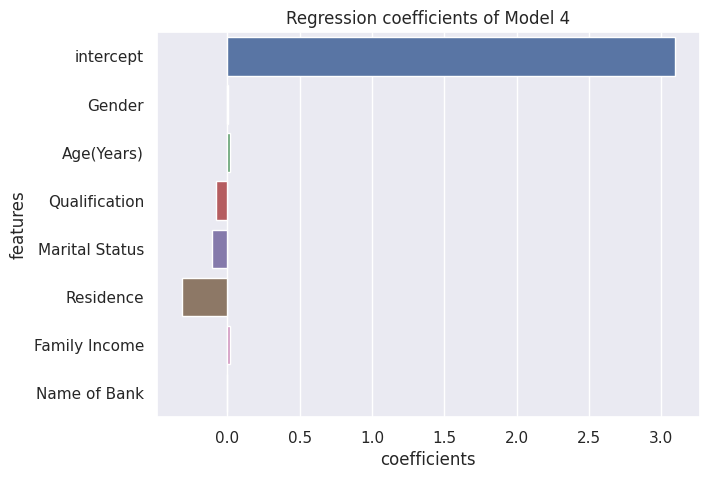

In [ ]:
# Define X (Demographic variables)
# Define y
X = df_ads_effectiveness[df_ads_effectiveness.columns[~df_ads_effectiveness.columns.isin(['advertisement effectiveness'])]]
y = df_ads_effectiveness['advertisement effectiveness']
# Run regression function to generate model, regression coefficient, training performance & testing performance
model_coef4, training_r2, testing_r2, X_train, X_test, y_train, y_test, model  = regression_model(X,y,rand_state=40)

# plt.figure(figsize=(15,10))
# coeff = reg.params
# coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]

# Print regression coefficients values & generate barplot
print('Regression performance: ')
print('Training R2: ', round(training_r2,4))
print('Training R2: ', round(testing_r2,4))
print('')
print('Regression Coefficients: ')
print('')
print(model_coef4)
sns.barplot(x=model_coef4.coefficients,
            y=model_coef4.features,
            orient='h')
plt.title('Regression coefficients of Model 4')
plt.show()

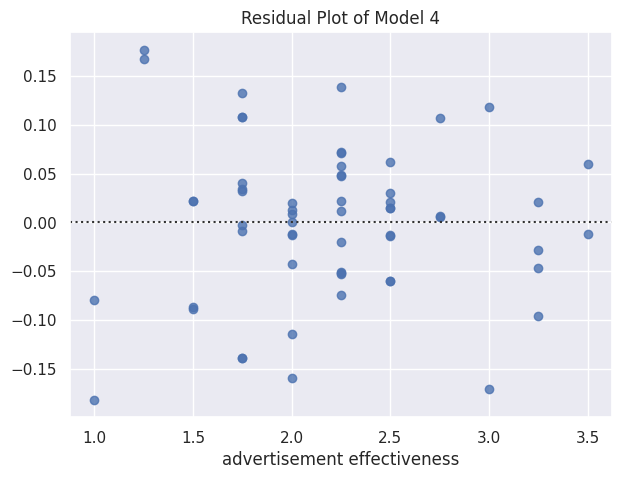

In [ ]:
# Generate Regression residual plot to see whether or not the residual value is randomized
# Set figure size and theme
ax = sns.set(rc={'figure.figsize':(7,5)}, style="darkgrid")
ax = sns.residplot(x = y_test,
              y = model.predict(X_test),
              data = data)

plt.title('Residual Plot of Model 4')
plt.show()

Remark:

- The advertisement effectiveness parameter shows low correlation with all demographic variables. As such, it is expected that the regression model performance wouldn't be good.
- The Training & Testing performance which is just around abs(0.04 and 0.08) though the residual plot shows a rather good randomization.
- The comparison between the demographic variables shows that the Residence category variable has a higher coefficient magnitude as compared to the other variables.

## Analysis of Measure 5: Social Media coverage vs Demographic Variables

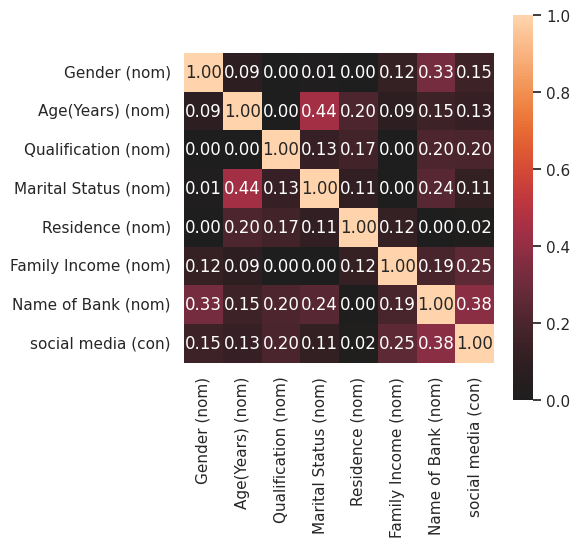

In [ ]:
# 'social media'
# Heatmap 1:
df_socmed = pd.concat([df[cols_demographic], df[['social media']] ], axis=1)
nominal.associations(df_socmed, figsize=(5,5), mark_columns=True);

Regression performance: 
Training R2:  0.0721
Training R2:  -0.0114

Regression Coefficients:           features  coefficients
0       intercept      2.434076
1          Gender     -0.115067
2      Age(Years)      0.033012
3   Qualification     -0.091314
4  Marital Status      0.048444
5       Residence      0.231080
6   Family Income     -0.046138
7    Name of Bank     -0.003737



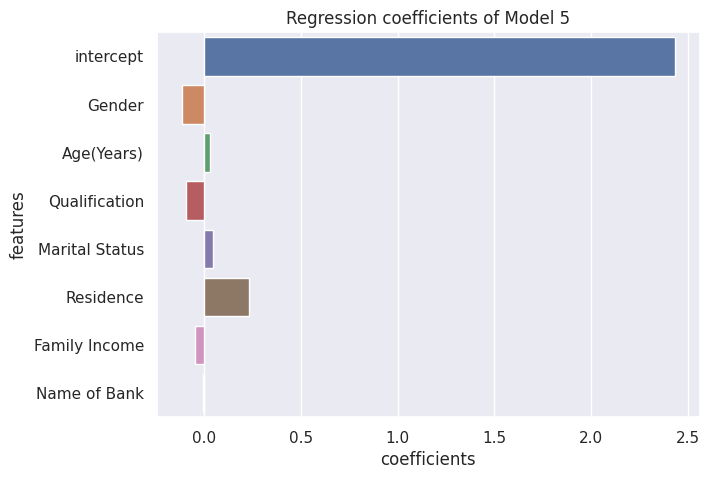

In [ ]:
# Define X (Demographic variables)
# Define y
X = df_socmed[df_socmed.columns[~df_socmed.columns.isin(['social media'])]]
y = df_socmed['social media']
# Run regression function to generate model, regression coefficient, training performance & testing performance
model_coef5, training_r2, testing_r2, X_train, X_test, y_train, y_test, model  = regression_model(X,y,rand_state=40)

# plt.figure(figsize=(15,10))
# coeff = reg.params
# coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]

# Print regression coefficients values & generate barplot
print('Regression performance: ')
print('Training R2: ', round(training_r2,4))
print('Training R2: ', round(testing_r2,4))
print('')
print('Regression Coefficients: ', model_coef5)
print('')
sns.barplot(x=model_coef5.coefficients,
            y=model_coef5.features,
            orient='h')
plt.title('Regression coefficients of Model 5')
plt.show()

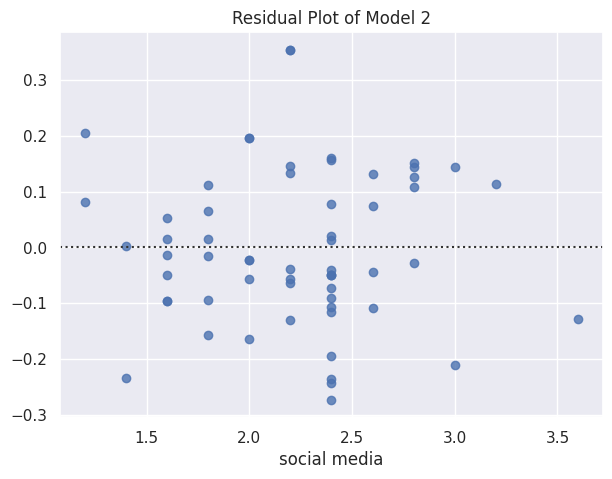

In [ ]:
# Generate Regression residual plot to see whether or not the residual value is randomized
# Set figure size and theme
ax = sns.set(rc={'figure.figsize':(7,5)}, style="darkgrid")
ax = sns.residplot(x = y_test,
              y = model.predict(X_test),
              data = data)

plt.title('Residual Plot of Model 2')
plt.show()

Remark:

- The social media coverage parameter shows an intermediate strength of correlation with Name of Bank (0.38) and Family Income (0.25)
- The Training & Testing performance are just around abs(0.07 and 0.01) and the residual plot shows that the residuals are more centralized
- The comparison between the demographic variables shows that the Residence category variable has a higher coefficient magnitude as compared to the other variables.

# Conclusion

- The 5 measured parameters on advertisements coverage & impacts are independent from each other.
Generally they are normally distributed with the peak at the Neutral rating (~3).
Thus, this shows that the survey has not resulted in a significant idea on the performance of the ads,
or people generally is not really impacted by the ads - either positively or negatively
- Residence category parameter shows a higher coefficients in all the 5 Regression models assessed. However, this could largely be caused by the significant imbalance in the samples on the residence category (Punjab vs Singh). Thus, this variable could be disregarded at the moment until more samples are obtained from the other Residence type other than Punjab.
- Another variable with some level of correlation with the 5 measures are the bank Branch.
  - Banks ads         - 0.28
  - Ads efficiency    - 0.35
  - Cust satisfaction - 0.33
  - Ads effectiveness - 0.23
  - Social meds	  - 0.38
- This could indicate that the impact & performance of banking ads could be affected by the specific bank branch itself physically - e.g. by the physical service, etc.

In [ ]:
-